In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [22]:
train_data = pd.read_csv("Downloads/train.csv")
print(train_data.shape)
train_data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
# Reassigning male and female string to more 'modellable' values
for i in range(train_data.shape[0]):
    if(train_data['Sex'][i] == 'male'):
        train_data['Sex'].values[i] = '0'
    if(train_data['Sex'][i] == 'female'):
        train_data['Sex'].values[i] = '1'
train_data.head(10)
mean = train_data['Age'].mean(axis = 0, skipna = True)
print(mean)

29.69911764705882


In [31]:
#Reassigning the NaN values in Age with the mean of the ages
for i in range(train_data.shape[0]):
    if(pd.isnull(train_data['Age'][i]) == True):
        train_data['Age'].values[i] = mean
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


(0.0, 100.0)

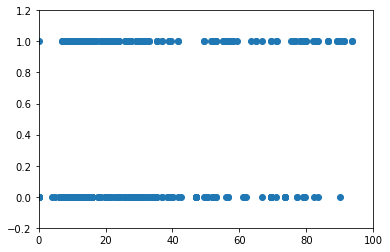

In [45]:
plt.scatter(train_data['Fare'].values, train_data['Survived'].values)
plt.ylim(-0.2, 1.2)
plt.xlim(0.0, 100.00)
# We see that fares given are fairly even in their survival chances

In [46]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X_train = np.array([train_data['Pclass'].values, train_data['Age'].values, train_data['SibSp'].values, train_data['Parch'].values, train_data['Sex'].values])
Y_train = np.array(train_data['Survived'].values)
print(X_train.shape, Y_train.shape)

(5, 891) (891,)


In [51]:
logReg = LogisticRegression()
logReg.fit(X_train.T, Y_train)

LogisticRegression()

In [55]:
test_data = pd.read_csv("Downloads/test.csv")
for i in range(test_data.shape[0]):
    if(test_data['Sex'][i] == 'male'):
        test_data['Sex'].values[i] = '0'
    if(test_data['Sex'][i] == 'female'):
        test_data['Sex'].values[i] = '1'
meant = test_data['Age'].mean(axis = 0, skipna = True)
for i in range(test_data.shape[0]):
    if(pd.isnull(test_data['Age'][i]) == True):
        test_data['Age'].values[i] = meant
X_test = np.array([test_data['Pclass'].values, test_data['Age'].values, test_data['SibSp'].values, test_data['Parch'].values, test_data['Sex'].values])
#Y_test = np.array(test_data['Survived'].values)
Y_pred = logReg.predict(X_test.T)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [56]:
ans_key = pd.read_csv("Downloads/my_submission.csv")
print(ans_key.shape)
ans_key.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [59]:
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(ans_key.shape[0]):
    if(Y_pred[i] == 1 and ans_key['Survived'][i] == 1):
        tp+=1
    if(Y_pred[i] == 1 and ans_key['Survived'][i] == 0):
        fp+=1
    if(Y_pred[i] == 0 and ans_key['Survived'][i] == 1):
        fn+=1
    if(Y_pred[i] == 0 and ans_key['Survived'][i] == 0):
        tn+=1
print(tp, fp)
print(fn, tn)

140 20
8 250


In [62]:
precision = tp/(tp+fp)
print("precision : ", precision)

precision :  0.875


In [63]:
recall = tp/(tp+fn)
print("recall : ", recall)

recall :  0.9459459459459459


In [64]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print("accuracy : ", accuracy)

accuracy :  0.9330143540669856
